# ***Week 3:** Unsupervised Learning & Clustering*

## *K-Means Clustering*

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Check for missing values
print(df.isnull().sum())

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


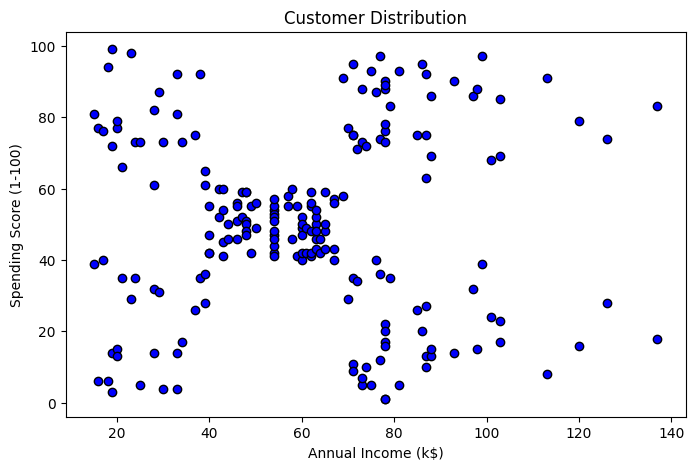

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', edgecolors='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

## *Elbow Method*

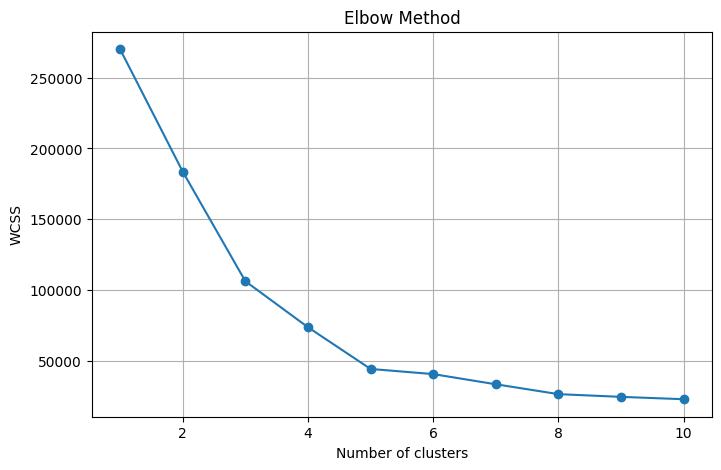

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

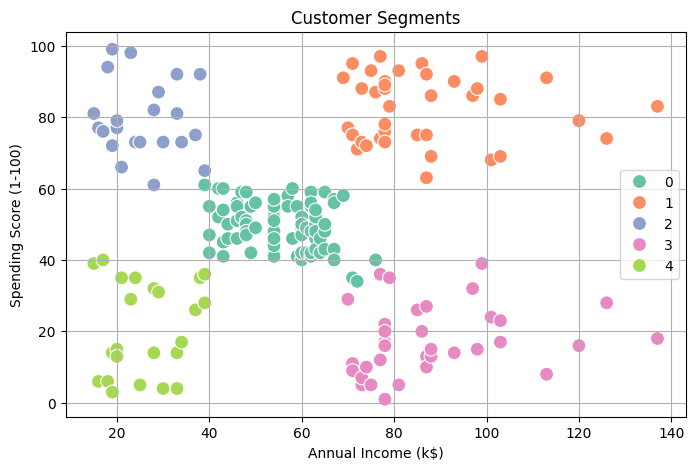

In [32]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

## *Visualize Clustering Results*

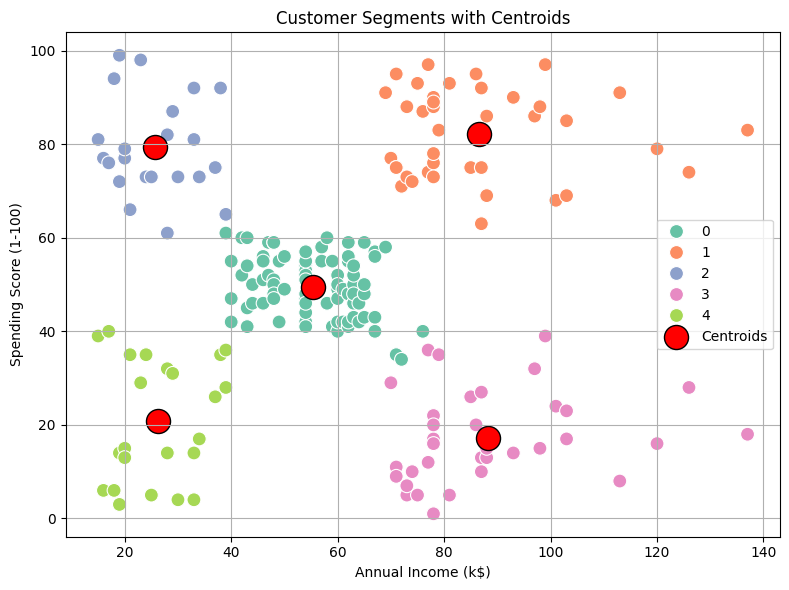

In [33]:
# Access cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette='Set2', 
    s=100,
    legend='full'
)

# Plot centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=300, 
    c='red', 
    marker='o', 
    label='Centroids', 
    edgecolors='black'
)

plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## *Hierarchical Clustering & Dendrogram*

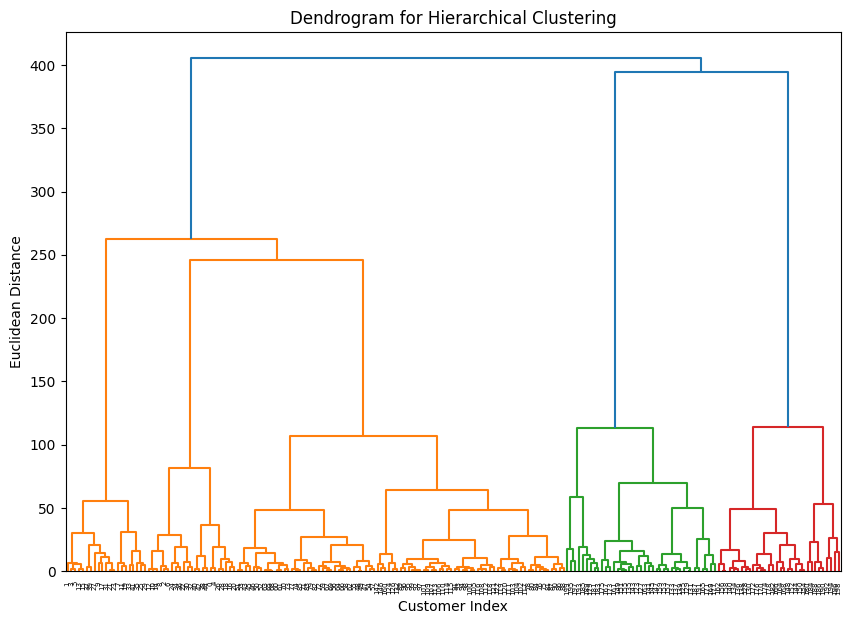

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
linked = linkage(X, method='ward')  # 'ward' minimizes variance within clusters

dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.grid(False)
plt.show()

## *Supervised vs Unsupervised Learning*

| Feature               | Supervised Learning              | Unsupervised Learning            |
|-----------------------|----------------------------------|----------------------------------|
| Data Labeled          | Yes                              | No                               |
| Goal                  | Predict labels or outcomes       | Find structure/groupings         |
| Examples              | Classification, Regression       | Clustering, Dimensionality Reduction |
| Algorithms            | Decision Trees, SVM, Linear Regression | K-Means, Hierarchical, PCA     |
| Use Cases             | Email spam detection, price prediction | Customer segmentation, anomaly detection |